In [87]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2, os
%matplotlib inline

In [60]:
image = cv2.imread('../dataset/Clipped_NDVI/awifs_ndvi_201701_15_1_clipped.tif')


In [61]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [62]:
print(image.shape)

(2135, 2118, 3)


In [65]:
image_copy = image
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        avg = 0
        for k in range(image.shape[2]):
            avg += image[i][j][k]
        avg = avg/3
        image_copy[i][j][1] = abs(255-avg)
        image_copy[i][j][0] = 0
        image_copy[i][j][2] = 0
    

In [66]:
 
array = (np.random.rand(2135, 2118)*256).astype(np.uint8)
 
img = Image.fromarray(image_copy)
img.save('test10.png')

### increasing sharpness

In [53]:
# sharp = [[0,-1,0],[-1,5,-1],[0,-1,0]]


In [54]:
# sharp_image = image_copy.dot(sharp)
 
# array = (np.random.rand(2135, 2118)*256).astype(np.uint8)
 
# img = Image.fromarray(sharp_image)
# img.save('test6.png')

In [55]:
# sharp_image.shape

In [52]:
# plt.figure(figsize=(25,25))
# plt.imshow(sharp_image)


### final function

In [97]:
def color_pixal(avg,month):
    if(month>=1 and month<=3):
        if(avg>=60 and avg<=125):
            return 1
    elif(month==4):
        if(avg>=70 and avg<=110):
            return 1
    elif(month>=5 and month<=7):
        if(avg>=15 and avg<=100):
            return 1
    elif(month>=8 and month<=9):
        if(avg>=17 and avg<=120):
            return 1
    elif(month>=10 and month<=11):
        if(avg>=69 and avg<=120):
            return 1
    elif(month==12):
        if(avg>=90 and avg<=150):
            return 1
    else:
        return 0

def doeverything(img,month):
    print('month is '+ str(month) )
    image_copy = img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            avg = 0
            for k in range(img.shape[2]):
                avg += img[i][j][k]/3
            if(color_pixal(avg,month)):
                image_copy[i][j][1] = 255
                image_copy[i][j][2] = 0
                image_copy[i][j][0] = 0
            else:
                image_copy[i][j][1] = 255
                image_copy[i][j][2] = 255
                image_copy[i][j][0] = 255
    return image_copy
                
def givemeeverything(location):
    image = cv2.imread(location)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    month = int(location[39:41])
    img = doeverything(image,month)
    #original image
    plt.figure(figsize=(20,15))
    plt.imshow(image)
    return img
    
def plotit(img, name):
    array = (np.random.rand(img.shape[0],image.shape[1])*256).astype(np.uint8)
    img = Image.fromarray(img)
    plt.figure(figsize=(20,15))
    plt.imshow(img)
    img.save(name + '.png')


month is 7


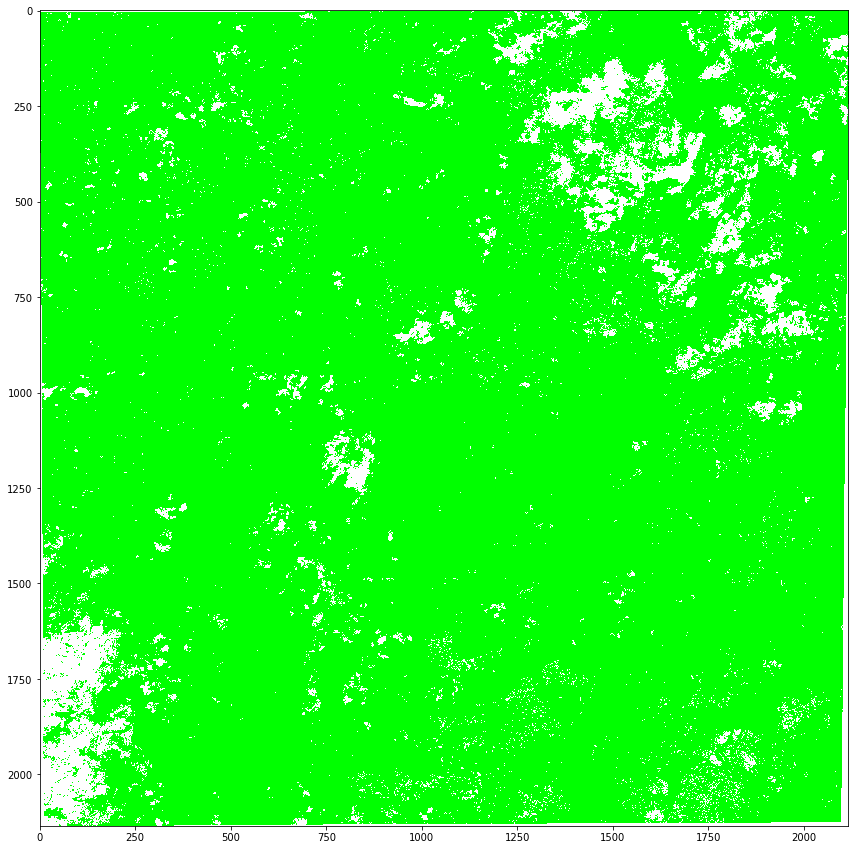

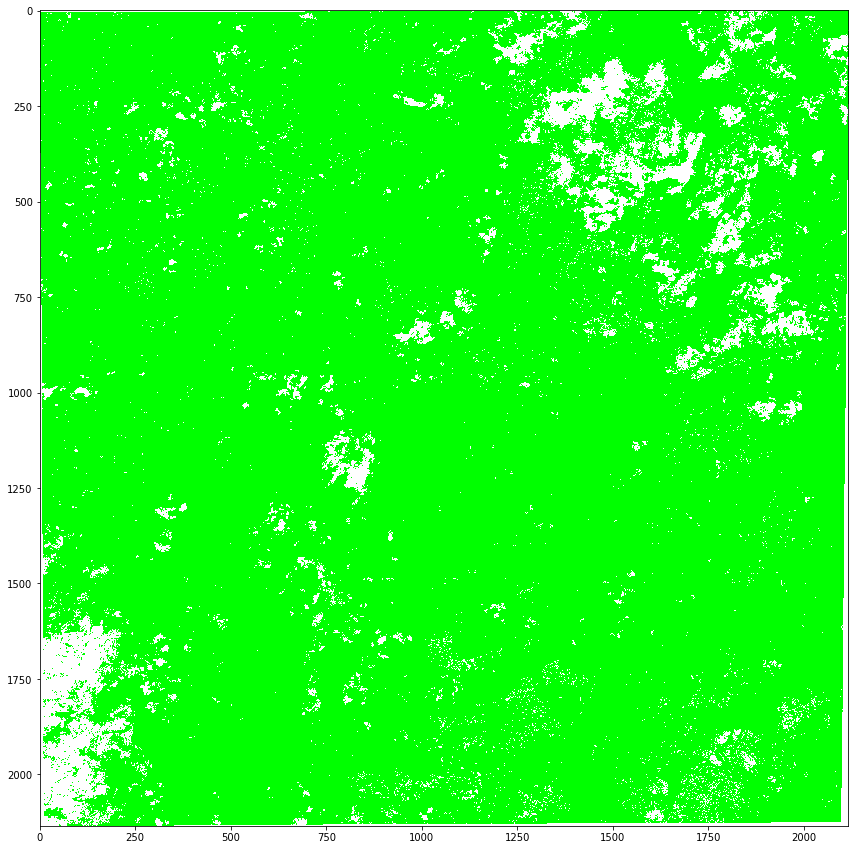

In [98]:
plotit( givemeeverything('../dataset/Clipped_NDVI/awifs_ndvi_201707_15_1_clipped.tif'), 'output2' )

In [82]:
# s = '../dataset/Clipped_NDVI/awifs_ndvi_201701_15_1_clipped.tif'
# s[39:41]

In [ ]:
for name in os.listdir('../dataset/Clipped_NDVI'):
    plotit( givemeeverything('../dataset/Clipped_NDVI/' + name), 'output/'+name )

month is 11
month is 10
month is 3
month is 10
